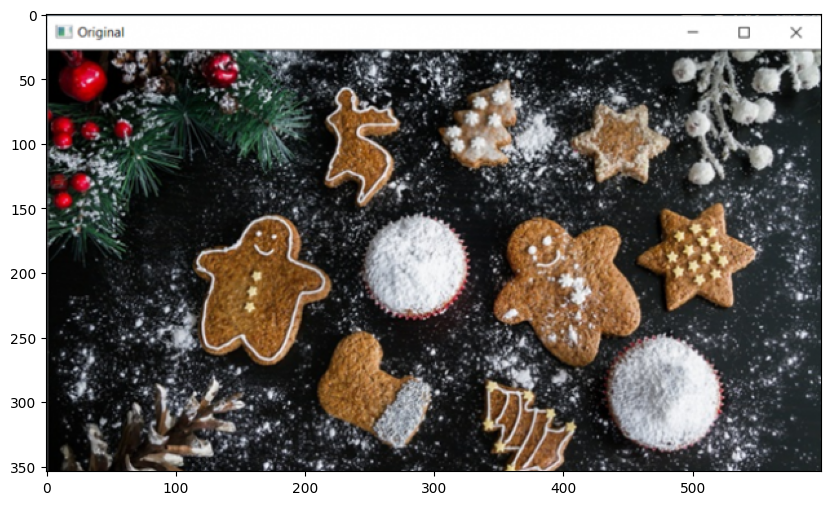

In [6]:
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision
from torchsummary import summary
import numpy as np

from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import cv2
import torchvision.transforms as transforms
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from torchvision.utils import save_image

# transform_object = transforms.Compose([
#     transforms.ToTensor()
# ])

image1 = cv2.imread(
#     '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/298.jpg') # , cv2.)
        '/Users/adityaagre/Downloads/11.png') # , cv2.)
# create figure 
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10, 7))

plt.imshow(image1, cmap="gray")



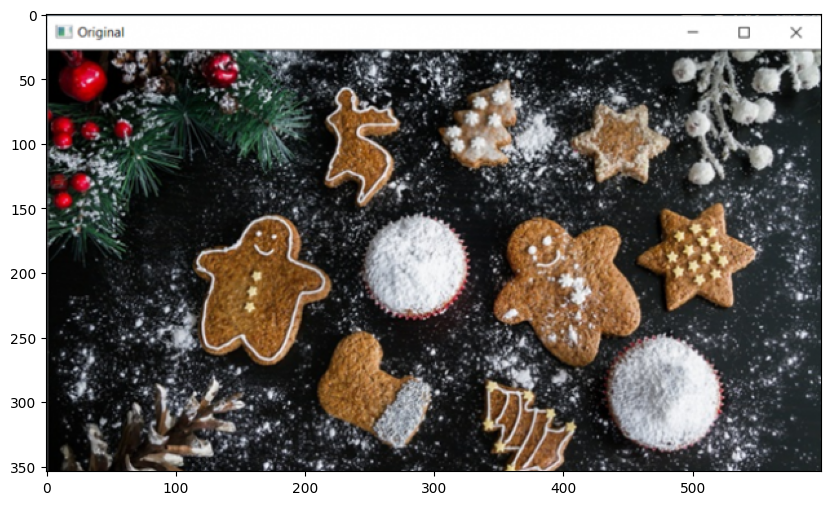

In [ ]:
image1 = cv2.imread('/Users/adityaagre/Downloads/11.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# image2 = cv2.imread('/Users/adityaagre/Desktop/Image Interpolation CV/data1/3.jpg')
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# image1 = cv2.imread('/Users/adityaagre/Downloads/11.png')
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 7))
plt.imshow(image1)

In [1]:
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import cv2
import torchvision.transforms as transforms
import numpy as np

from PIL import Image


import cv2
import torchvision.transforms as transforms
import numpy as np

from torchvision.utils import save_image



## Writing a convolutional network for these dimensions

## Initialising weights function

def normal_init(m):
    if isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Conv2d):
        m.weight.data.normal_(0.0, 0.02)
        m.bias.data.zero_()
        

class convolution_(nn.Module):
    def __init__(self):
        super(convolution_, self).__init__()
        
 

        self.conv_layer1 = nn.Conv2d(in_channels= 6, out_channels= 100, kernel_size= 5, padding = 2)
#         self.pool2 = nn.MaxPool2d(5, padding = 2)
#         self.norm5 = nn.BatchNorm2d(256)
        self.conv_layer3 = nn.Conv2d(in_channels= 100, out_channels= 3, kernel_size= 5, padding = 2)
#         self.pool4 = nn.MaxPool2d(5, padding = 2)
    
    def weight_init(self):
        for m in self._modules:
            normal_init(self._modules[m])

    def forward(self, input):
        x = self.conv_layer1(input)
        x = F.relu(x)
#         x = self.pool2(x)
#         x = F.relu(x)
#         x = self.norm5(x)
#         x = F.relu(x)
        x = self.conv_layer3(x)
        x = F.relu(x)
#         x = self.pool4(x)
#         x = F.relu(x)
        
        
        return x
    
conv = convolution_()
conv.weight_init()
# print(summary(conv, (3,480,360)))



<class 'numpy.ndarray'>
(354, 600, 3)
<class 'numpy.ndarray'>
(354, 600, 3)
<class 'numpy.ndarray'>
(354, 600, 6)
tensor([[[0.0000e+00, 4.2197e-03, 1.9349e-02,  ..., 8.7382e-03,
          4.7115e-02, 3.0730e-02],
         [0.0000e+00, 1.2135e-02, 3.5839e-02,  ..., 5.9940e-02,
          8.8492e-02, 6.5932e-02],
         [0.0000e+00, 6.1976e-02, 7.0883e-02,  ..., 1.2696e-01,
          1.2530e-01, 1.0621e-01],
         ...,
         [2.6180e-02, 3.5148e-02, 3.4754e-03,  ..., 2.1429e-02,
          1.5310e-02, 0.0000e+00],
         [1.4569e-02, 2.7154e-02, 1.1228e-02,  ..., 3.0400e-02,
          2.6755e-02, 1.6703e-02],
         [0.0000e+00, 1.5063e-02, 1.7620e-02,  ..., 2.1777e-02,
          2.8124e-02, 2.1757e-02]],

        [[9.9316e-02, 1.3080e-01, 1.1244e-01,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [2.0431e-01, 2.3959e-01, 2.1257e-01,  ..., 1.0320e-02,
          5.1654e-03, 0.0000e+00],
         [2.4966e-01, 2.9517e-01, 2.8024e-01,  ..., 6.1387e-02,
          2.98

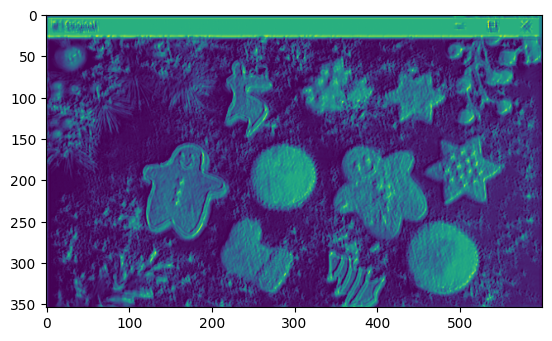

In [ ]:
## Trying out output for the above read image's tensor.

image1 = cv2.imread('/Users/adityaagre/Downloads/11.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('/Users/adityaagre/Downloads/11.png')
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


# cv2.resize(image2, (3, 480, 360))
print(type(image2))
print(image2.shape)
print(type(image1))
print(image1.shape)



# Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
image_combined = np.concatenate((image1, image2), axis=2)
print(type(image_combined))
print(image_combined.shape)

transform_object = transforms.Compose([
    transforms.ToTensor()
])

image_tensor_combined = transform_object(image_combined)


z_out = conv(image_tensor_combined)


print(z_out)
print(z_out.shape)
print(type(z_out))


# import matplotlib.pyplot as plt
# tensor_numpy = z_out.permute(1, 2, 0).detach().numpy()
# #  Display the image using matplotlib
# plt.imshow(z_out)
# plt.axis('off')  # To hide axis
# plt.show()

print()
print(summary(conv, (6, 1800, 2880)))
print()


import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(z_out[0].detach())

In [2]:
## Training

# Loss
loss_obj = nn.MSELoss()  ## Beacause we have comparison between images at the end. This is not a classiification task

## Hyperparameters
beta1 = 0.001
beta2 = 0.002
learning_rate = 0.001

## Optimizer
optimizer_object = optim.Adam(
    params = conv.parameters(),
    lr = learning_rate,
    betas = (beta1, beta2)   
)

# Object to transform images to tensors
transform_object = transforms.Compose([transforms.ToTensor()])

In [4]:
def image_loader(path):
    image1 = cv2.imread(path) 
    # create figure 
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    # image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#     print(type(image1), image1.shape)
    return image1

# image_loader('/Users/adityaagre/Downloads/11.png')

In [5]:
for epoch in range(5):
    
    i = 200
    j = 202
    
    train_loss = []

    while(j<210):
        path1 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/296.jpg'
        path3 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/306.jpg'
        target_path = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/301.jpg'
        
#         image1 = cv2.imread(path1)
#         image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        

#         image2 = cv2.imread(path3)
#         image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        
#         target_image = cv2.imread(target_path)
#         target_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        
#         target_image = cv2.imread(target_path)
#         target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
        
        image1 = image_loader(path1) 
        image2 = image_loader(path3)
        target_image = image_loader(target_path)

        # Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
#         image_combined = np.concatenate((image1, image2), axis=2)
        
        if image1.ndim == 3 and image2.ndim == 3:
            image_combined = np.concatenate((image1, image2), axis=2)
        else:
            print("One of the arrays is not 3-dimensional.")
    
#         image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
        print(image_tensor_combined.shape)

        output_image_tensor = conv(image_tensor_combined)
        actual_image_tensor = transform_object(target_image)
        
        loss_calculated = loss_obj(output_image_tensor, actual_image_tensor)
        loss_calculated.backward()
        optimizer_object.step()
        
        train_loss.append(loss_calculated)
        

        print("Window:", i, j, loss_calculated)
        
        i+=3
        j+=3
        

torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0801, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0430, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.0410, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0080, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0184, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.0247, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0165, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0065, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.0062, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0134, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0082, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.01

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.0746, 0.1129, 0.1683,  ..., 0.2259, 0.1911, 0.1574],
         [0.1050, 0.1595, 0.2399,  ..., 0.3296, 0.2817, 0.2281],
         [0.1317, 0.2018, 0.2924,  ..., 0.4021, 0.3253, 0.2660],
         ...,
         [0.0444, 0.0596, 0.0837,  ..., 0.2102, 0.1714, 0.1376],
         [0.0383, 0.0502, 0.0696,  ..., 0.1719, 0.1369, 0.1135],
         [0.0300, 0.0374, 0.0502,  ..., 0.1152, 0.0920, 0.0771]],

        [[0.1232, 0.1815, 0.2594,  ..., 0.3376, 0.2863, 0.2060],
         [0.1500, 0.2268, 0.3285,  ..., 0.4267, 0.3574, 0.2624],
         [0.1707, 0.2620, 0.3868,  ..., 0.5068, 0.4334, 0.3184],
         ...,
         [0.0437, 0.0604, 0.0892,  ..., 0.2487, 0.2201, 0.1630],
         [0.0347, 0.0474, 0.0681,  ..., 0.1869, 0.1734, 0.1273],
         [0.0223, 0.0300, 0.0445,  ..., 0.1211, 0.1133, 0.0902]],

        [[0.0501, 0.0625, 0.0996,  ..., 0.1260, 0.0891, 0.0791],
         [0.0751, 0.1018, 0.1422,  ..., 0.1796, 0.1294, 0.0898],
         [0.1222, 0.1588, 0.2101,  ..., 0.2578, 0.1947, 0.

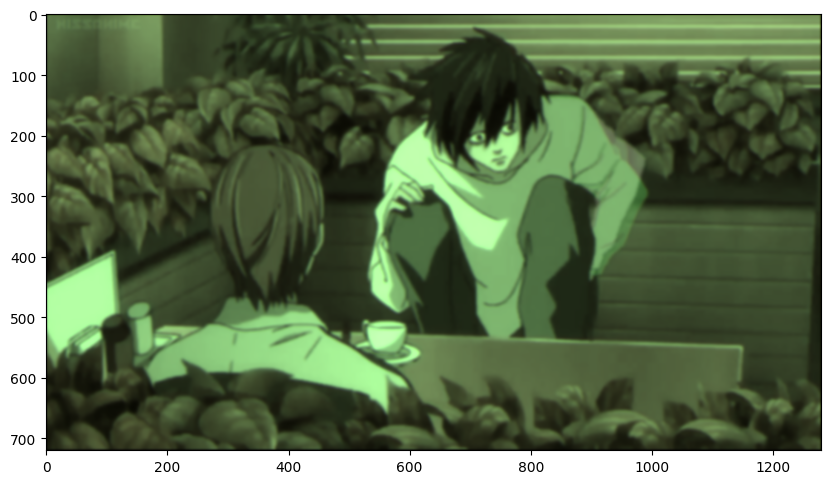

In [ ]:
print((output_image_tensor), output_image_tensor.shape)
output_ndarray = output_image_tensor.cpu().detach().numpy()
print(type(output_ndarray), output_ndarray.shape)
# output_ndarray.T
output_ndarray = output_ndarray.swapaxes(0,1)
output_ndarray = output_ndarray.swapaxes(1,2)
print(type(output_ndarray), output_ndarray.shape)
fig = plt.figure(figsize=(10, 7))
plt.imshow(output_ndarray)

In [25]:
for epoch in range(5):
    
    i = 200
    j = 202
    
    train_loss = []

    while(j<210):
        path1 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i) + '.jpg'
        path3 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(j) + '.jpg'
        target_path = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i+5) + '.jpg'
        
        image1 = image_loader(path1) 
        image2 = image_loader(path3)
        target_image = image_loader(target_path)

        # Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
#         image_combined = np.concatenate((image1, image2), axis=2)
        
        if image1.ndim == 3 and image2.ndim == 3:
            image_combined = np.concatenate((image1, image2), axis=2)
        else:
            print("One of the arrays is not 3-dimensional.")
    
#         image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
#         print(image_tensor_combined.shape)

        output_image_tensor = conv(image_tensor_combined)
        actual_image_tensor = transform_object(target_image)
        
        loss_calculated = loss_obj(output_image_tensor, actual_image_tensor)
        loss_calculated.backward()
        optimizer_object.step()
        
        train_loss.append(loss_calculated)
        

        print("Window:", i, j, loss_calculated)
        
        i+=3
        j+=3
        

torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0127, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0043, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.0036, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0088, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0073, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.0043, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0017, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0042, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.0082, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 200 202 tensor(0.0045, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 203 205 tensor(0.0023, grad_fn=<MseLossBackward0>)
torch.Size([6, 720, 1280])
Window: 206 208 tensor(0.00

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.2102, 0.2982, 0.3934,  ..., 0.3443, 0.2852, 0.2245],
         [0.2854, 0.4006, 0.5448,  ..., 0.4841, 0.3982, 0.3103],
         [0.3504, 0.4889, 0.6598,  ..., 0.5722, 0.4577, 0.3575],
         ...,
         [0.1481, 0.1973, 0.2611,  ..., 0.1593, 0.1316, 0.1062],
         [0.1132, 0.1456, 0.1922,  ..., 0.1197, 0.0987, 0.0815],
         [0.0874, 0.1068, 0.1418,  ..., 0.0916, 0.0759, 0.0653]],

        [[0.1883, 0.2276, 0.3328,  ..., 0.3105, 0.2524, 0.1961],
         [0.2198, 0.2908, 0.4255,  ..., 0.3950, 0.3296, 0.2544],
         [0.2296, 0.3071, 0.4766,  ..., 0.4563, 0.3915, 0.2974],
         ...,
         [0.1014, 0.1328, 0.1974,  ..., 0.1358, 0.1221, 0.0967],
         [0.0787, 0.1048, 0.1502,  ..., 0.1068, 0.0998, 0.0769],
         [0.0426, 0.0605, 0.0946,  ..., 0.0762, 0.0760, 0.0630]],

        [[0.0270, 0.0483, 0.0880,  ..., 0.0598, 0.0437, 0.0363],
         [0.0490, 0.0697, 0.1271,  ..., 0.0897, 0.0693, 0.0463],
         [0.1215, 0.1617, 0.2427,  ..., 0.1775, 0.1395, 0.

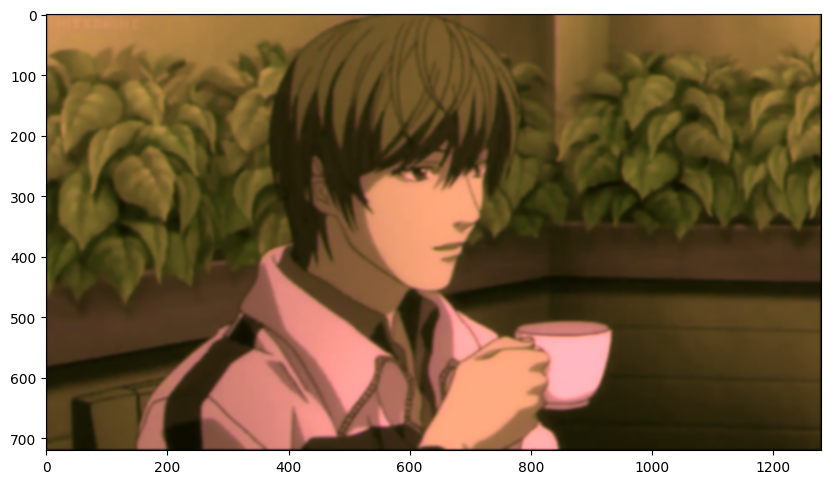

In [26]:
print((output_image_tensor), output_image_tensor.shape)
output_ndarray = output_image_tensor.cpu().detach().numpy()
print(type(output_ndarray), output_ndarray.shape)
# output_ndarray.T
output_ndarray = output_ndarray.swapaxes(0,1)
output_ndarray = output_ndarray.swapaxes(1,2)
print(type(output_ndarray), output_ndarray.shape)
fig = plt.figure(figsize=(10, 7))
plt.imshow(output_ndarray)

(720, 1280, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


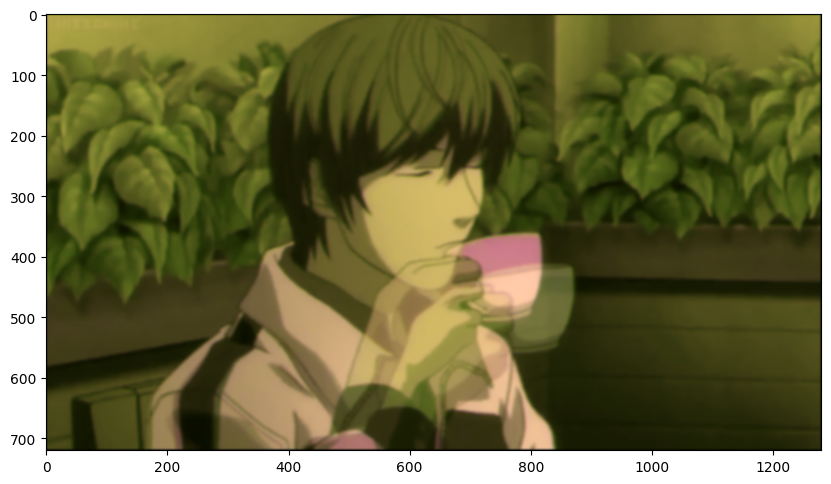

In [39]:
def inference(path1,path2):
        image1 = image_loader(path1) 
        image2 = image_loader(path2)
        image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
        output_image_tensor = conv(image_tensor_combined)
        output_ndarray = output_image_tensor.cpu().detach().numpy()
        output_ndarray = output_ndarray.swapaxes(0,1)
        output_ndarray = output_ndarray.swapaxes(1,2)
        print(output_ndarray.shape)
#         img_ans = Image.fromarray(output_ndarray, 'RGB')
#         img_ans.save('out.png')
        save_image(output_image_tensor, 'out.png')
        fig = plt.figure(figsize=(10, 7))
        plt.imshow(output_ndarray)
        
inference('/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/180.jpg', '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/190.jpg')

In [37]:
from torchvision.utils import save_image

In [40]:
for epoch in range(5):
    
    i = 200
    j = 210
    
    train_loss = []

    while(j<300):
        path1 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i) + '.jpg'
        path3 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(j) + '.jpg'
        target_path = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i+5) + '.jpg'
        
        image1 = image_loader(path1) 
        image2 = image_loader(path3)
        target_image = image_loader(target_path)

        # Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
#         image_combined = np.concatenate((image1, image2), axis=2)
        
        if image1.ndim == 3 and image2.ndim == 3:
            image_combined = np.concatenate((image1, image2), axis=2)
        else:
            print("One of the arrays is not 3-dimensional.")
    
#         image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
#         print(image_tensor_combined.shape)

        output_image_tensor = conv(image_tensor_combined)
        actual_image_tensor = transform_object(target_image)
        
        loss_calculated = loss_obj(output_image_tensor, actual_image_tensor)
        loss_calculated.backward()
        optimizer_object.step()
        
        train_loss.append(loss_calculated)
        

        print("Window:", i, j, loss_calculated)
        
        i+=3
        j+=3
        

Window: 200 210 tensor(0.0019, grad_fn=<MseLossBackward0>)
Window: 203 213 tensor(0.0052, grad_fn=<MseLossBackward0>)
Window: 206 216 tensor(0.0070, grad_fn=<MseLossBackward0>)
Window: 209 219 tensor(0.0032, grad_fn=<MseLossBackward0>)
Window: 212 222 tensor(0.0047, grad_fn=<MseLossBackward0>)
Window: 215 225 tensor(0.0068, grad_fn=<MseLossBackward0>)
Window: 218 228 tensor(0.0048, grad_fn=<MseLossBackward0>)
Window: 221 231 tensor(0.0036, grad_fn=<MseLossBackward0>)
Window: 224 234 tensor(0.0089, grad_fn=<MseLossBackward0>)
Window: 227 237 tensor(0.0026, grad_fn=<MseLossBackward0>)
Window: 230 240 tensor(0.0030, grad_fn=<MseLossBackward0>)
Window: 233 243 tensor(0.0107, grad_fn=<MseLossBackward0>)
Window: 236 246 tensor(0.0050, grad_fn=<MseLossBackward0>)
Window: 239 249 tensor(0.0024, grad_fn=<MseLossBackward0>)
Window: 242 252 tensor(0.0054, grad_fn=<MseLossBackward0>)
Window: 245 255 tensor(0.0064, grad_fn=<MseLossBackward0>)
Window: 248 258 tensor(0.0066, grad_fn=<MseLossBackward0

KeyboardInterrupt: 

In [45]:
print(type(loss_calculated), loss_calculated.item())

<class 'torch.Tensor'> 0.00404081866145134


In [48]:
mse_list = []

for epoch in range(1):
    
    i = 1
    j = i + 10
    
    train_loss = []

    while(j<4000):
        path1 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i) + '.jpg'
        path3 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(j) + '.jpg'
        target_path = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i+5) + '.jpg'
        
        image1 = image_loader(path1) 
        image2 = image_loader(path3)
        target_image = image_loader(target_path)

        # Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
#         image_combined = np.concatenate((image1, image2), axis=2)
        
        if image1.ndim == 3 and image2.ndim == 3:
            image_combined = np.concatenate((image1, image2), axis=2)
        else:
            print("One of the arrays is not 3-dimensional.")
    
#         image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
#         print(image_tensor_combined.shape)

        output_image_tensor = conv(image_tensor_combined)
        actual_image_tensor = transform_object(target_image)
        
        loss_calculated = loss_obj(output_image_tensor, actual_image_tensor)
        loss_calculated.backward()
        optimizer_object.step()
        
        mse_list.append(loss_calculated.item())
        

        print("Window:", i, j, loss_calculated)
        
        i+=20
        j+=20
        
        

Window: 1 11 tensor(0.0306, grad_fn=<MseLossBackward0>)


In [49]:
print(mse_list)

[0.03062576614320278]


In [51]:
mse_list = []

for epoch in range(1):
    
    i = 1
    j = i + 10
    
    train_loss = []

    while(j<400):
        path1 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i) + '.jpg'
        path3 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(j) + '.jpg'
        target_path = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i+5) + '.jpg'
        
        image1 = image_loader(path1) 
        image2 = image_loader(path3)
        target_image = image_loader(target_path)

        # Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
#         image_combined = np.concatenate((image1, image2), axis=2)
        
        if image1.ndim == 3 and image2.ndim == 3:
            image_combined = np.concatenate((image1, image2), axis=2)
        else:
            print("One of the arrays is not 3-dimensional.")
    
#         image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
#         print(image_tensor_combined.shape)

        output_image_tensor = conv(image_tensor_combined)
        actual_image_tensor = transform_object(target_image)
        
        loss_calculated = loss_obj(output_image_tensor, actual_image_tensor)
        loss_calculated.backward()
        optimizer_object.step()
        
        mse_list.append(loss_calculated.item())
        

        print("Window:", i, j, loss_calculated)
        
        i+=20
        j+=20
        
        

Window: 1 11 tensor(0.0311, grad_fn=<MseLossBackward0>)
Window: 21 31 tensor(0.0311, grad_fn=<MseLossBackward0>)
Window: 41 51 tensor(0.0207, grad_fn=<MseLossBackward0>)
Window: 61 71 tensor(0.0127, grad_fn=<MseLossBackward0>)
Window: 81 91 tensor(0.0074, grad_fn=<MseLossBackward0>)
Window: 101 111 tensor(0.0051, grad_fn=<MseLossBackward0>)
Window: 121 131 tensor(0.0056, grad_fn=<MseLossBackward0>)
Window: 141 151 tensor(0.0084, grad_fn=<MseLossBackward0>)
Window: 161 171 tensor(0.0155, grad_fn=<MseLossBackward0>)
Window: 181 191 tensor(0.0521, grad_fn=<MseLossBackward0>)
Window: 201 211 tensor(0.0234, grad_fn=<MseLossBackward0>)
Window: 221 231 tensor(0.0198, grad_fn=<MseLossBackward0>)
Window: 241 251 tensor(0.0167, grad_fn=<MseLossBackward0>)
Window: 261 271 tensor(0.0140, grad_fn=<MseLossBackward0>)
Window: 281 291 tensor(0.0126, grad_fn=<MseLossBackward0>)
Window: 301 311 tensor(0.0109, grad_fn=<MseLossBackward0>)
Window: 321 331 tensor(0.0109, grad_fn=<MseLossBackward0>)
Window: 

(720, 1280, 3)


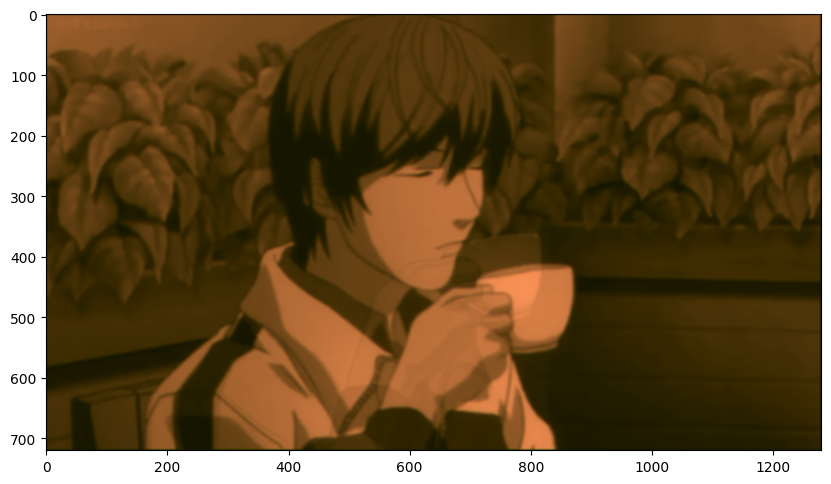

In [52]:
inference('/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/180.jpg', '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/190.jpg')

(720, 1280, 3)


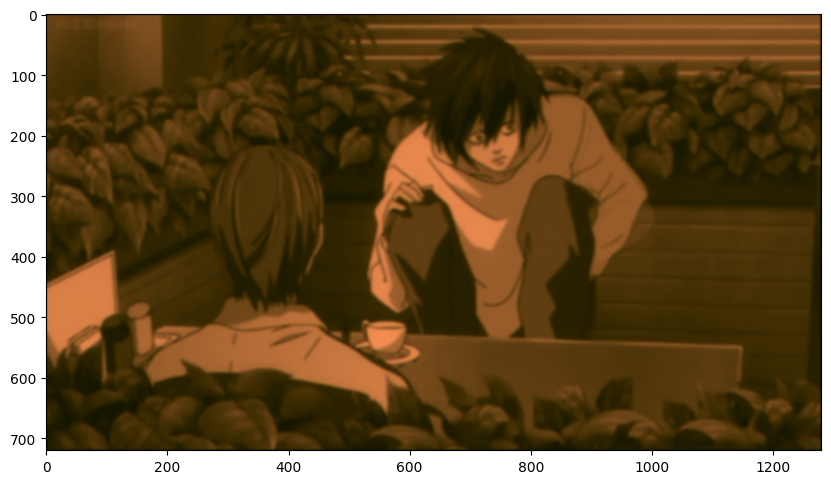

In [54]:
inference('/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/280.jpg', '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/290.jpg')

In [60]:
mse_list2 = []

for epoch in range(1):
    
    i = 1
    j = i + 10
    
#     train_loss = []

    while(j<4000):
        path1 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i) + '.jpg'
        path3 = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(j) + '.jpg'
        target_path = '/Users/adityaagre/Desktop/Image Interpolation CV/data3_deathnote/images/' + str(i+5) + '.jpg'
        
        image1 = image_loader(path1) 
        image2 = image_loader(path3)
        target_image = image_loader(target_path)

        # Taking 2 numpy arrays with 3 channels each and making a 6 channel combined array from it.
#         image_combined = np.concatenate((image1, image2), axis=2)
        
        if image1.ndim == 3 and image2.ndim == 3:
            image_combined = np.concatenate((image1, image2), axis=2)
        else:
            print("One of the arrays is not 3-dimensional.")
    
#         image_combined = np.concatenate((image1, image2), axis=2)
        image_tensor_combined = transform_object(image_combined)
#         print(image_tensor_combined.shape)

        output_image_tensor = conv(image_tensor_combined)
        actual_image_tensor = transform_object(target_image)
        
        loss_calculated = loss_obj(output_image_tensor, actual_image_tensor)
        loss_calculated.backward()
        optimizer_object.step()
        
        mse_list2.append(loss_calculated.item())
        

        print("Window:", i, j, loss_calculated)
        
        i+=20
        j+=20
    
    
    

Window: 1 11 tensor(0.0085, grad_fn=<MseLossBackward0>)
Window: 21 31 tensor(0.0079, grad_fn=<MseLossBackward0>)
Window: 41 51 tensor(0.0077, grad_fn=<MseLossBackward0>)
Window: 61 71 tensor(0.0072, grad_fn=<MseLossBackward0>)
Window: 81 91 tensor(0.0062, grad_fn=<MseLossBackward0>)
Window: 101 111 tensor(0.0072, grad_fn=<MseLossBackward0>)
Window: 121 131 tensor(0.0108, grad_fn=<MseLossBackward0>)
Window: 141 151 tensor(0.0158, grad_fn=<MseLossBackward0>)
Window: 161 171 tensor(0.0202, grad_fn=<MseLossBackward0>)
Window: 181 191 tensor(0.0273, grad_fn=<MseLossBackward0>)
Window: 201 211 tensor(0.0246, grad_fn=<MseLossBackward0>)
Window: 221 231 tensor(0.0265, grad_fn=<MseLossBackward0>)
Window: 241 251 tensor(0.0290, grad_fn=<MseLossBackward0>)
Window: 261 271 tensor(0.0269, grad_fn=<MseLossBackward0>)
Window: 281 291 tensor(0.0193, grad_fn=<MseLossBackward0>)
Window: 301 311 tensor(0.0146, grad_fn=<MseLossBackward0>)
Window: 321 331 tensor(0.0123, grad_fn=<MseLossBackward0>)
Window: 

Window: 2741 2751 tensor(0.1644, grad_fn=<MseLossBackward0>)
Window: 2761 2771 tensor(0.2415, grad_fn=<MseLossBackward0>)
Window: 2781 2791 tensor(0.3421, grad_fn=<MseLossBackward0>)
Window: 2801 2811 tensor(0.2189, grad_fn=<MseLossBackward0>)
Window: 2821 2831 tensor(0.0788, grad_fn=<MseLossBackward0>)
Window: 2841 2851 tensor(0.0510, grad_fn=<MseLossBackward0>)
Window: 2861 2871 tensor(0.0715, grad_fn=<MseLossBackward0>)
Window: 2881 2891 tensor(0.0937, grad_fn=<MseLossBackward0>)
Window: 2901 2911 tensor(0.0945, grad_fn=<MseLossBackward0>)
Window: 2921 2931 tensor(0.0944, grad_fn=<MseLossBackward0>)
Window: 2941 2951 tensor(0.0940, grad_fn=<MseLossBackward0>)
Window: 2961 2971 tensor(0.0936, grad_fn=<MseLossBackward0>)
Window: 2981 2991 tensor(0.0933, grad_fn=<MseLossBackward0>)
Window: 3001 3011 tensor(0.0494, grad_fn=<MseLossBackward0>)
Window: 3021 3031 tensor(0.0494, grad_fn=<MseLossBackward0>)
Window: 3041 3051 tensor(0.0494, grad_fn=<MseLossBackward0>)
Window: 3061 3071 tensor

In [58]:
mse_list

[0.031123513355851173,
 0.031135516241192818,
 0.020661184564232826,
 0.012663447298109531,
 0.007395742926746607,
 0.005071424879133701,
 0.005626454018056393,
 0.008368822745978832,
 0.015544749796390533,
 0.052095066756010056,
 0.023372000083327293,
 0.019809633493423462,
 0.01667279377579689,
 0.014046210795640945,
 0.01262598391622305,
 0.010929612442851067,
 0.010888676159083843,
 0.00999200064688921,
 0.011693165637552738,
 0.013611309230327606]

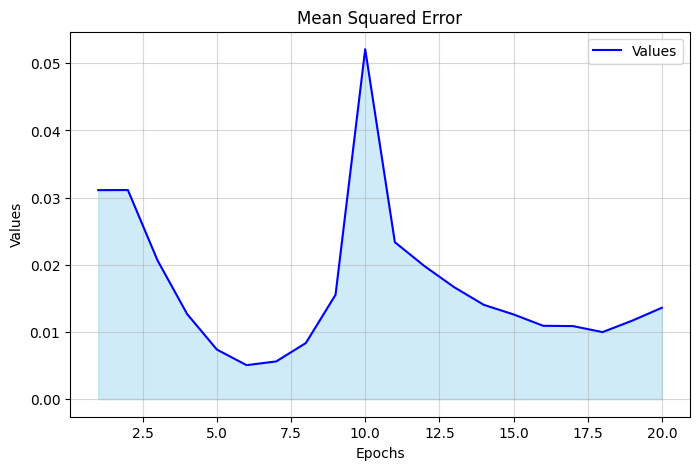

In [63]:
import matplotlib.pyplot as plt

# Example list of values
values = mse_list

# Generate serial numbers for the x-axis
x = range(1, len(values) + 1)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, values, color='blue', label='Values')  # Line chart
plt.fill_between(x, values, color='skyblue', alpha=0.4)  # Fill under the line

# Add labels and title
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Values')

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend()

# Display the plot
plt.show()


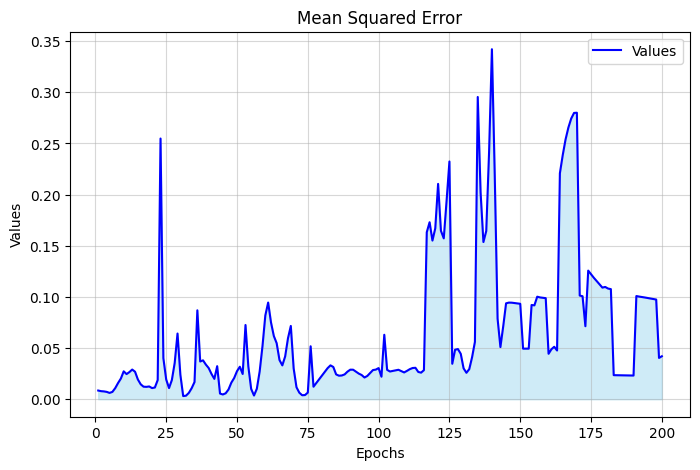

In [64]:
import matplotlib.pyplot as plt

# Example list of values
values = mse_list2

# Generate serial numbers for the x-axis
x = range(1, len(values) + 1)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, values, color='blue', label='Values')  # Line chart
plt.fill_between(x, values, color='skyblue', alpha=0.4)  # Fill under the line

# Add labels and title
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Values')

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend()

# Display the p